In [ ]:
import cv2
import numpy as np
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0

AttributeError: 'tuple' object has no attribute 'T'

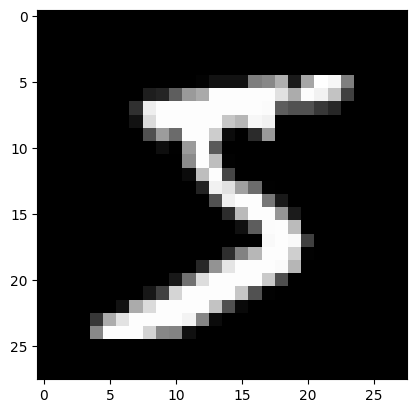

5


In [3]:
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.imshow(training_images[0])
plt.show()
print(training_labels[0])

In [53]:
# Entrenamos el modelo. Esto ya va a existir y lo vamos a usar para despues obtener los pesos y el prentrenamiento.
from tensorflow import keras

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/5


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8672 - loss: 0.4435
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9774 - loss: 0.0727
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.0504
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0366
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0291
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9852 - loss: 0.0441


Model: "functional_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 8)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
(1, 5, 5, 8)


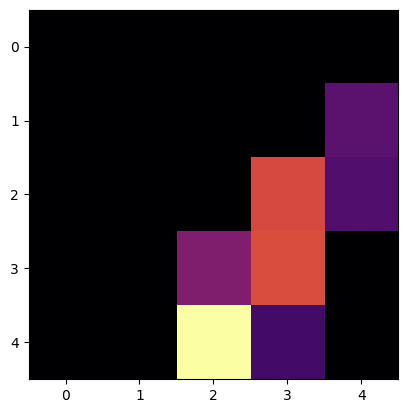

7


In [ ]:
new_input = tf.keras.Input(shape=(28,28,1))
new_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-3].output)
new_model.summary()

# Cambiamos el tamaño de las imagenes para que coincidan con el modelo y así entren bien.
# En realidad no se hace un cambio a la imagen, más bien, se hace un cambio en las dimensiones de la matriz de la imagen
test_images = [image.reshape(1, 28, 28, 1) for image in test_images]

features = new_model.predict(test_images[0])
print(features.shape)
#import matplotlib.pyplot as plt
#
#plt.grid(False)
#plt.gray()
#plt.imshow(features[0, : , :, 6], cmap='inferno')
#plt.show()
#print(test_labels[0])

In [ ]:
new_input = tf.keras.Input(shape=(28,28,1))
new_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-5].output)
new_model.summary()

# Cambiamos el tamaño de las imagenes para que coincidan con el modelo y así entren bien.
# En realidad no se hace un cambio a la imagen, más bien, se hace un cambio en las dimensiones de la matriz de la imagen
test_images = [image.reshape(1, 28, 28, 1) for image in test_images]

features = new_model.predict(test_images[0])
print(features.shape)
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.imshow(features[0, : , :, 6], cmap='inferno')
plt.show()
print(test_labels[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


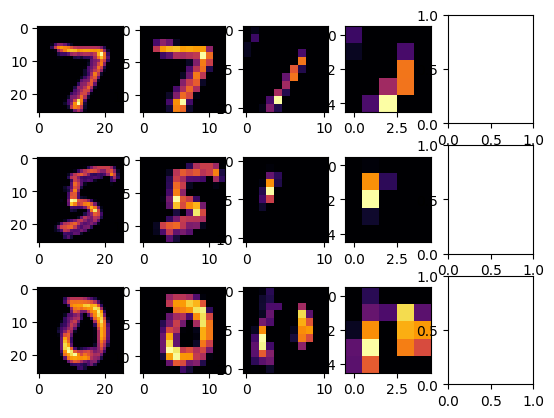

In [43]:
# Validación del modelo.

import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,5)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 7

config = model.get_config()
activation_model = tf.keras.Model(
    inputs=model.inputs,
    outputs=[layer.output for layer in model.layers],
)


for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)